In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating project at `~/Projects/learning/lecture-notebooks/Lecture 3`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ ~/Projects/learning/lecture-notebooks/Lecture 3/Manifest.toml:0


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
# function f(x)
#     return x.^4 + x.^3 - x.^2 - x
# end

function f(x)
    return x.^2 - x
end

f (generic function with 1 method)

In [4]:
# function ∇f(x)
#     return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
# end

function ∇f(x)
    return 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [5]:
# function ∇2f(x)
#     return 12.0*x.^2 + 6.0*x - 2.0
# end

function ∇2f(x)
    return 2.0
end

∇2f (generic function with 1 method)

In [6]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64, Int64}:
 -1.75, -1.747, -1.74399, -1.74099, …, 1.24099, 1.24399, 1.247, 1.25

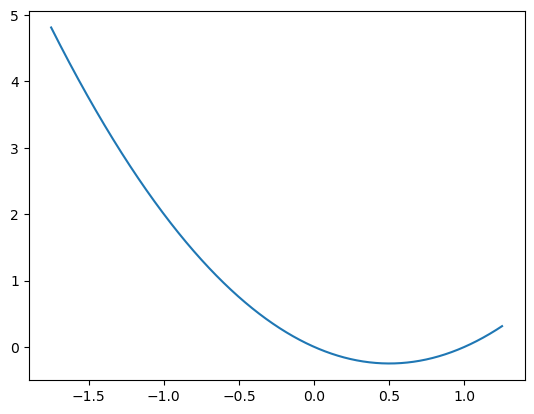

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e1e2f2cf70>

In [7]:
p = plot(x,f(x))

In [8]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

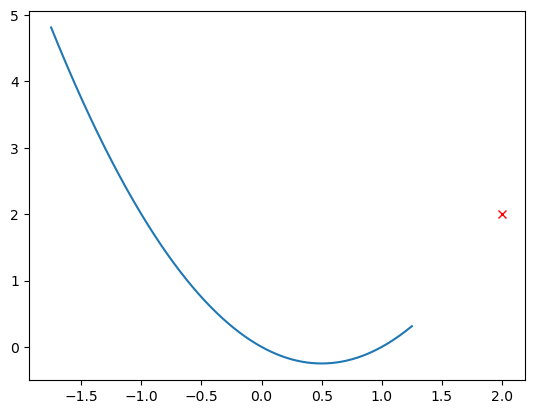

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e1e0db40a0>

In [21]:
xguess = 2.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

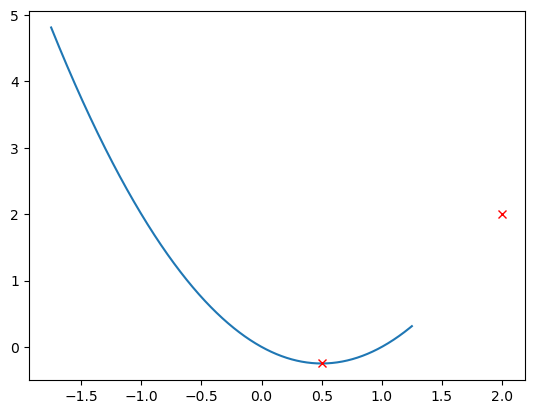

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e1e0c20850>
 PyObject <matplotlib.lines.Line2D object at 0x73e1e0c20910>

In [22]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [15]:
∇2f(0.0)

2.0

In [16]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

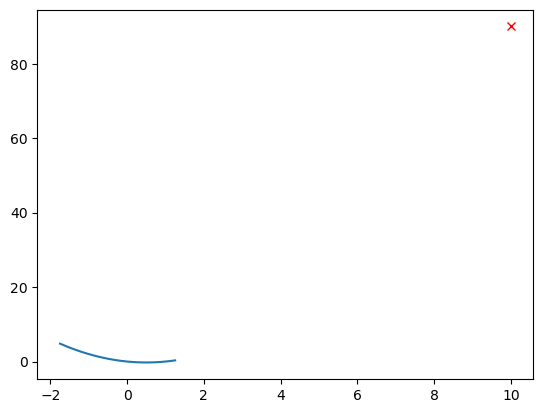

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e1e11d8730>

In [19]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

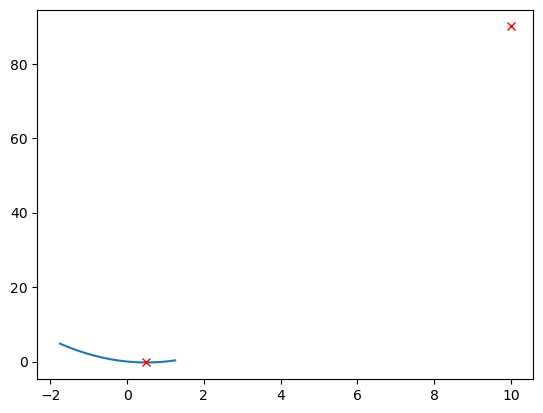

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e1e0d4c2b0>
 PyObject <matplotlib.lines.Line2D object at 0x73e1e0d4c370>

In [20]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")